# Proyecto de Data Science para Coderhouse

por Christian Bastias

### Descripción del proyecto
Este proyecto consiste en la elaboración de un modelo predictivo que permita estimar la popularidad de una canción en base a una serie de factores vinculados a las características de una canción. Se utiliza un conjunto de datos que describe las características de las 2000 canciones más populares en Spotify, que fueron lanzadas entre 2000 y 2019. 

### Presentación del problema a desarrollar

Durante los últimos 20 años, sólo unas pocas de las miles de canciones publicadas cada año alcanzan los primeros puestos de los rankings internacionales de popularidad.
Aquellos artistas y bandas que alcanzan estos puestos por primera vez, ven sus vidas y oportunidades cambiadas para siempre, siendo ahora visibles para todo el mundo, atentos a sus nuevos lanzamientos de álbumes y sencillos, mientras que aquellos artistas con años de trayectoria consolidan, una vez más, su posición de popularidad en el mundo.
Por otro lado, algunos artistas tienen múltiples canciones posicionadas por muchos años en múltiples rankings internacionales, como *Love Will Tear Us Apart* de *Joy Division*, por ejemplo. Mientras que otros tienen una breve pero intensa popularidad, como *Somebody That I Used to Know* de *Gotye*. A estos últimos se les conoce como *One Hit Wonders*, o artistas que alcanzan un puesto de popularidad por primera vez en una sola instancia.

Tomando en consideración lo anterior y el gran volumen de canciones lanzadas por año, de múltiples géneros y de múltiples artistas, se puede decir, en primera instancia, que la popularidad de una canción es una variable que se puede determinar a partir de una serie de factores que emergen de éstas.


### Objetivo de estudio

Para este proyecto, se busca estudiar las propensión de las personas en relación a sus preferencias musicales. A lo largo de la historia de la música, las personas han cambiado gradualmente sus gustos musicales, y por lo tanto, es seguro conjeturar que esto supone un cambio en las características de las canciones que se escuchan.
En conjunto, se explora la relación entre dicha preferencia musical y los factores que afectan y determinan la popularidad de las canciones.

El objetivo de esta investigación es la construcción de un modelo que permita predecir una canción como popular o no, basado en una serie de factores que se pueden identificar a partir de los datos presentes en el *dataset*.


 ### Fuente de datos y criterios de eleccción

Se utiliza el siguiente *dataset*: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

Este *dataset* recopila información sobre las canciones más populares entre el año 2000 y el 2019, según Spotify. Además de elementos descriptivos como el nombre de la canción, el artista, la duración, el año de publicación, etc., este *dataset* presenta elementos probabilísticos y categóricos, ideales tanto para aplicación de análisis descriptivos y asociativos de los datos como para la implementación de técnicas de *Machine Learning* para la construcción de procedimientos de carácter clasificativo y predictivo.

Se escoge este conjunto de datos por el siguiente criterio:

- Relevantes para el análisis de las preferencias musicales de las personas.
- Posee una gran cantidad de caracterísiticas, lo que permite es estudio de la problematica de las preferencias musicales de las personas, desde diferentes perspectivas.
- Son estructurados, lo que permite una mayor manipulación de los datos.
- Son mixtos, es decir, se presentan múltiples variables categóricas y numéricas, lo que permite una mayor flexibilidad del análisis.

### Descripción de los datos

Para comprender algunos aspectos de los datos, se describe qué representa cada una de las variables presentes:

| Dato | Descripción | Tipo |
| --- | --- | --- |
| Artist | Nombre del artista. | String|
| Song | Nombre de la canción. | String|
| Duration_ms | Duración en milisegundos. | Float|
| Explicit | Indica si la letra de la canción es explícita o no. | Boolean|
| Year | Año de publicación de la canción. | Float|
| Popularity | Popularidad de la canción. Entre mayor el valor, más popular es la canción. | Float|
| Danceability | Describe qué tan adecuada es la canción para el baile, basado en una combinación de elementos musicales (*tempo*, estabilidad del ritmo, intensidad y regularidad). Entre mayor el valor, más bailable es la canción. | Float|
| Energy | Representa una métrica perceptual de la intensidad de una canción. | Float|
| Key | Describe la tonalidad de la canción. Basado en la notación de clases de tonos. 0 es C, 1 es C#, 2 es D, etc. Si el valor es -1, indica que no se pudo identificar. | Integer|
| Loudness | Describe el volumen de la canción, en términos de decibeles (dB). Se comprende como la característica del sonido asociada con la fuerza física del mismo. | Float|
| Mode | Modalidad de la canción. 0 indica que está en escala mayor y 1 en menor. | Integer|
| Speechiness | Describe la presencia de palabras habladas en la canción. Canciones con valores inferiores a 0.33 indica que la canción está compuesta mayormente de música (electrónica, por ejemplo); valores entre 0,33 y 0,66 indica una combinación entre música y discurso; y valores mayores a 0,66 indica gran presencia de palabras habladas (rap y hip-hop, por ejemplo.). | Float|
| Acousticness | Índice de confiancia que describe si una canción es acústica o no. | Float|
| Instrumentalness | Factor de predicción respecto a si una canción posee contenido vocal. Entre mayor el número, mayor la posibilidad de que la canción sea más instrumental que vocal. | Float|
| Liveness | Describe la presencia de audiencia en la grabación de la canción. Entre mayor el factor, mayor la probabilidad de que la cangión haya sido presentada con público. | Float|
| Valence | Describe la positividad transmitida por la canción. Mayores valores indican mayor valencia (canción más alegre y jovial), mientras que valores inferiores indican menor valencia (canción triste o depresiva). | Float|
| Tempo | Indica los pulsos por minutos estimados en una canción (BPM). | Float|
| Genre | Género de la canción. | String|

## *Data Wrangling* y *Data Adquisition*

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
df = pd.read_csv('songs_normalize.csv')

In [245]:
df.sample(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
515,Gwen Stefani,Rich Girl,236213,False,2004,68,0.856,0.754,7,-2.728,0,0.0416,0.0294,0.000015,0.2060,0.722,98.018,"pop, R&B"
1498,Nicki Minaj,Bed Of Lies,269946,True,2014,53,0.716,0.670,11,-5.779,1,0.1940,0.2510,0.000000,0.1090,0.124,86.010,"hip hop, pop"
686,KT Tunstall,Black Horse And The Cherry Tree,172373,False,2005,64,0.748,0.786,4,-7.788,0,0.0641,0.3280,0.000000,0.3400,0.917,104.833,"World/Traditional, pop, Folk/Acoustic"
1886,Drake,I'm Upset,214466,True,2018,68,0.899,0.586,11,-7.866,0,0.3430,0.2790,0.000000,0.0836,0.492,150.002,"hip hop, pop, R&B"
383,Monica,So Gone,242773,False,2003,64,0.618,0.552,8,-6.863,1,0.0981,0.1760,0.000000,0.2520,0.586,81.975,"pop, R&B"


In [246]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [247]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [248]:
df.shape

(2000, 18)

#### Histograma general

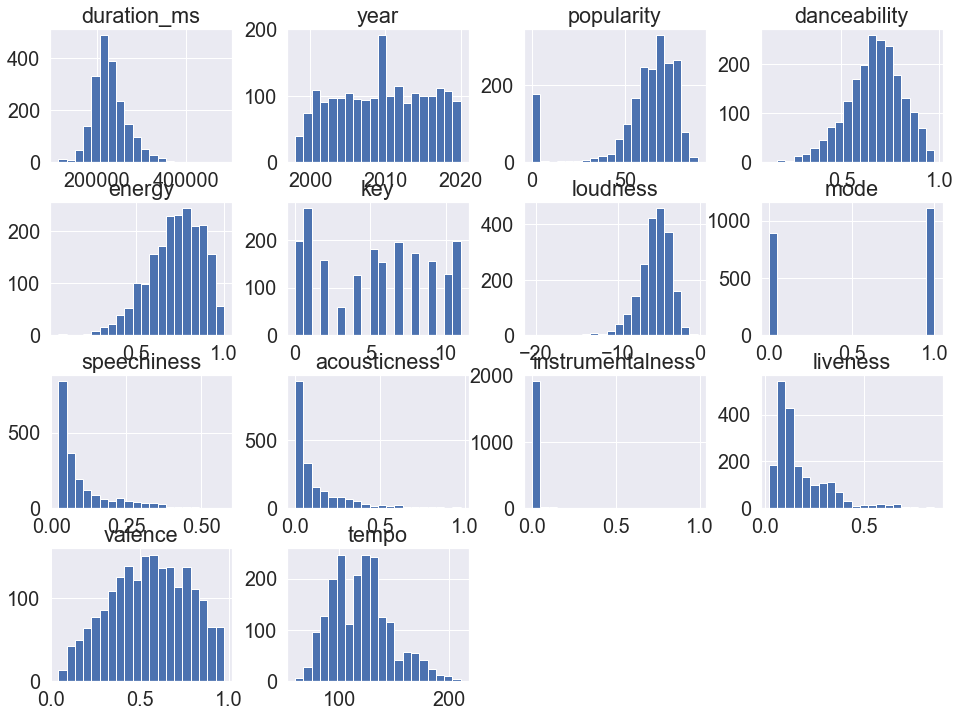

In [249]:
df.hist(bins=20,figsize=(16,12))
plt.show()

## Exploratory Data Analysis

### Análisis Univariado

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [251]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
artist,2000,835,Rihanna,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,2000,1879,Sorry,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,2000.0,NaN,NaN,NaN,228748.1245,39136.569008,113000.0,203580.0,223279.5,248133.0,484146.0
explicit,2000,2,False,1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,2000.0,NaN,NaN,NaN,2009.494,5.85996,1998.0,2004.0,2010.0,2015.0,2020.0
popularity,2000.0,NaN,NaN,NaN,59.8725,21.335577,0.0,56.0,65.5,73.0,89.0
danceability,2000.0,NaN,NaN,NaN,0.667438,0.140416,0.129,0.581,0.676,0.764,0.975
energy,2000.0,NaN,NaN,NaN,0.720366,0.152745,0.0549,0.622,0.736,0.839,0.999
key,2000.0,NaN,NaN,NaN,5.378,3.615059,0.0,2.0,6.0,8.0,11.0
loudness,2000.0,NaN,NaN,NaN,-5.512434,1.933482,-20.514,-6.49025,-5.285,-4.16775,-0.276


#### Histograma

Se busca observar la densidad de los datos en el histograma, en relación al año en que fue publicada cada canción.

[Text(0.5, 1.0, 'Histograma de densidad de las canciones publicadas por año')]

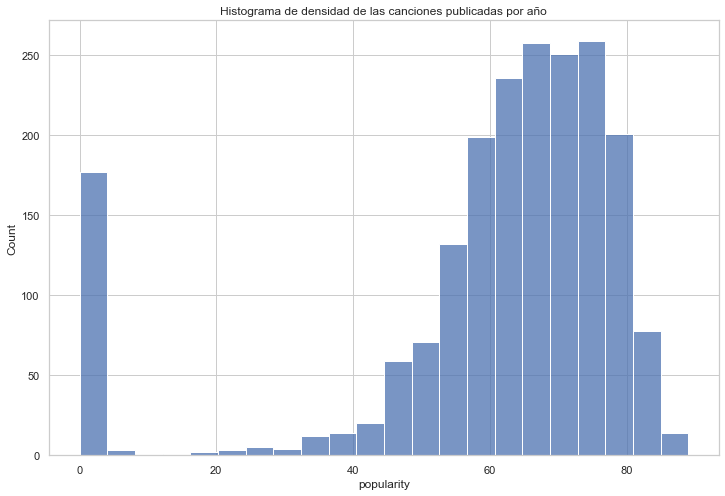

In [252]:
sns.set(style='whitegrid', context='notebook')
fig, axes = plt.subplots(figsize=(12, 8))
sns.histplot(x='popularity',data=df,ax=axes,bins=22).set(title='Histograma de densidad de las canciones publicadas por año')

Se destaca que existen una menor cantidad de canciones populares registradas previo al 2002.

#### KDE Plot
Se busca observar la densidad de los datos, utilizando el *Kernel Density Estimation* (KDE).

<AxesSubplot:xlabel='popularity', ylabel='Density'>

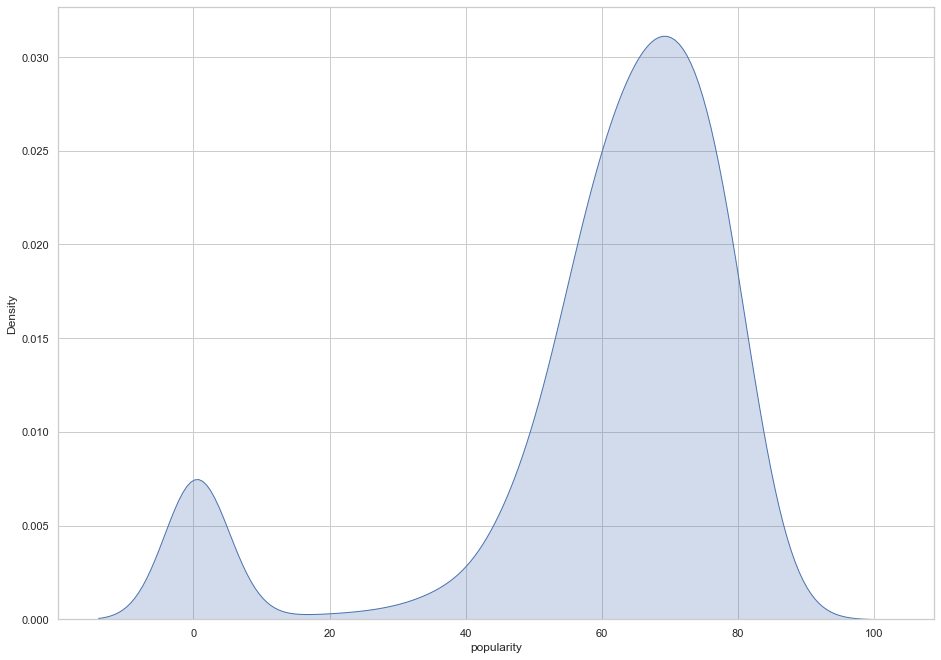

In [253]:
sns.kdeplot(df['popularity'], shade=True)

EL *KDE Plot* muestra muestra dos concentraciones de densidad, por lo lo que se comprende a la densidad de los datos en función de la popularidad de las canciones como bimodal.

## Análisis Bivariado


#### Tabla de correlación

In [255]:
pearson = df.corr(method='pearson')
pearson.head()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418


#### Gŕafico de correlación según método de Pearson

<AxesSubplot:>

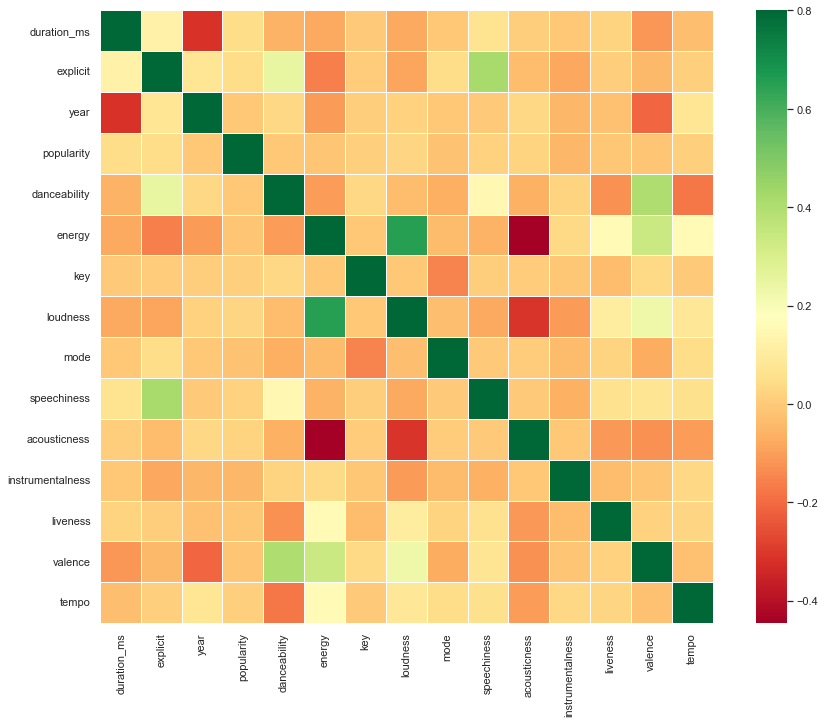

In [256]:
pearson_graf = df.dropna().corr(method='pearson')
sns.heatmap(pearson_graf, cmap='RdYlGn', vmax=.8, square=True, linewidths=.5)

No se aprecia una alta correlación de las variables con *Popularity*. Se estima una baja presición en la predicción de la popularidad de una canción. Con esto en mente, se decide aplicar múltiples técnicas de *Machine Learning* para el modelo.

### Scatterplot
Este grafico permite observar si es que el factor de viveza de una canción cambia con respecto a su popularudad, con el fin de observar si dicho factor establece una relación con la popularidad de una canción.

[Text(0.5, 1.0, 'Scatterplot entre Viveza y Año de publicación')]

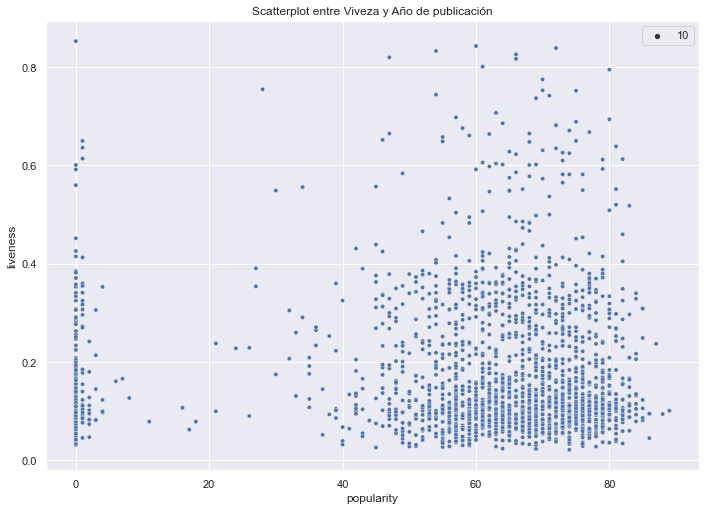

In [257]:
df.corr('spearman')['year']['liveness']
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(x = 'popularity', y = 'liveness', data=df,size=10, ).set(title='Scatterplot entre Viveza y Año de publicación')

Por inspección, se observa que la gran mayoría de las canciones populares poseen un factor de vivencia menor a 0.4, indicando que dichas canciones no suelen ser grabadas en vivo o con audiencia.

#### Análisis Numérico vs Categórico

<AxesSubplot:xlabel='key', ylabel='popularity'>

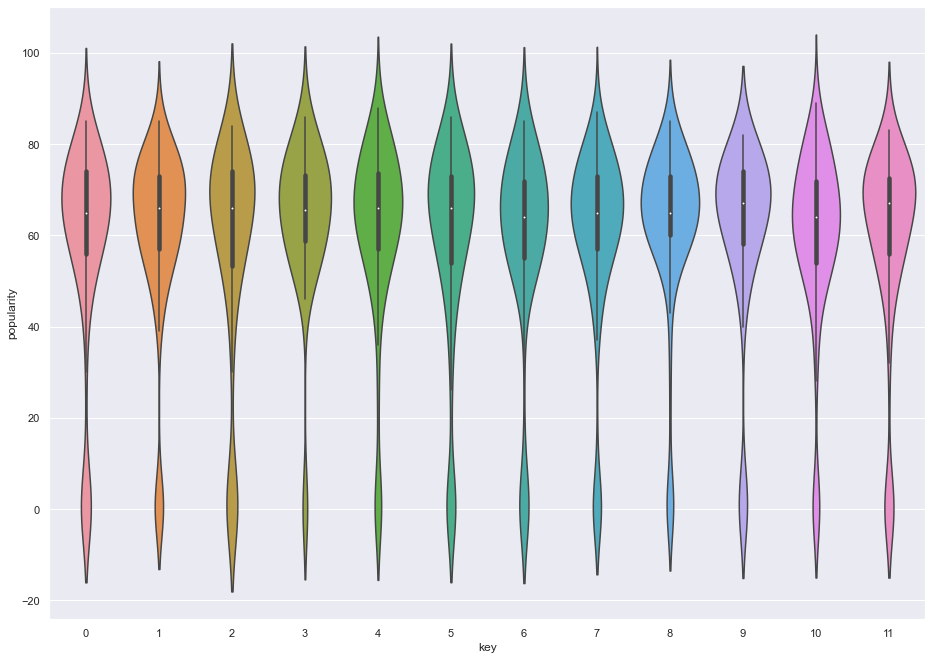

In [258]:
sns.set(rc={'figure.figsize':(15.7,11.27)})
sns.violinplot(x = 'key', y = 'popularity', data = df)

Se observa que la popularidad de las canciones, en función de la llave, no supone una diferencia significativa para estimarlo como un factor relevante.

#### Análisis Categórico vs Categórico


En esta sección, se busca determinar una relación entre la explicitud de una canción y el año de publicación, con el fin de estimar un cambio en las últimas décadas.

<AxesSubplot:xlabel='year'>

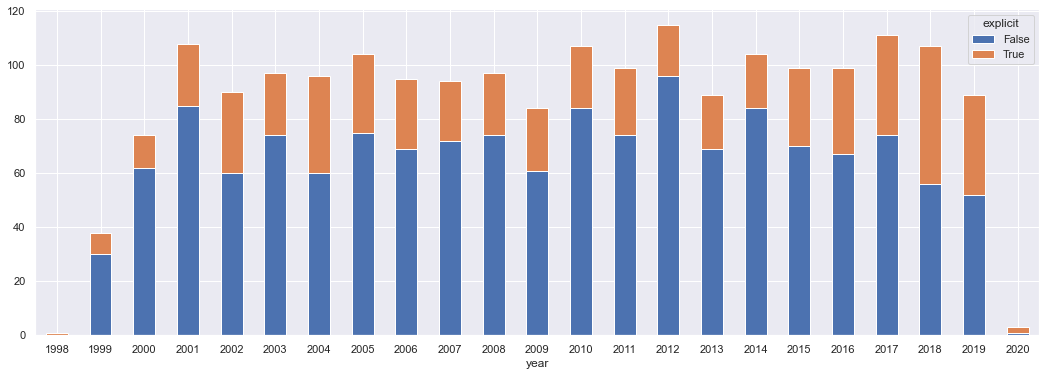

In [259]:
df_cross = pd.crosstab(df['year'], df['explicit'])
df_cross.plot(kind = 'bar', stacked = 'True', rot=0, figsize = (18,6))

Se observa que, a partir de 2017 las canciones populares tienden a ser más explicitas en su contenido que aquellas en los años anteriores. Sin embargo, no es suficiente para establecer un cambio de tendencia en las canciones populares.

## Análisis Multivariado

In [260]:
from sklearn import datasets

#### Jointplot
Este gráfico nos permite observar la relación entre la viveza, que se comprende como el factor de probabilidad de que la canción haya sido grabada con público presente, y el *tempo*, que se entiende como los BPM (beats por minuto), que es el número de pulsaciones por minuto que se producen, indicando el ritmo de la canción.

Se busca que estas variables proyecten una relación de dependencia entre si mismas, en función del año en que sus respectivas canciones fueron publicadas.

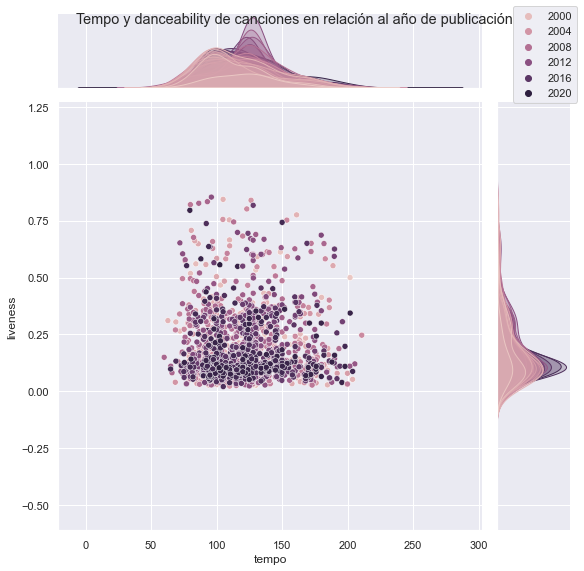

In [261]:
df_plot = sns.jointplot(data=df, x="tempo", y="liveness", hue="year",height=8)
df_plot.fig.suptitle('Tempo y danceability de canciones en relación al año de publicación') 
df_plot.ax_joint.legend_._visible = False
df_plot.fig.legend(bbox_to_anchor=(1,1), loc=1)

Se extrae de este gráfico que, a lo largo de todo el periodo de tiempo, la gran mayoría de estas canciones presentan un factor de viveza inferior a 0.5, de modo que se puede inferir que estas canciones no suelen ser grabadas frente a público.

#### FacetGrid
Este gráfico busca revelar la relación entre la bailabilidad de una canción y su energía (que es una medida perceptual de la intensidad de la música), en función del año en que fue publicada.

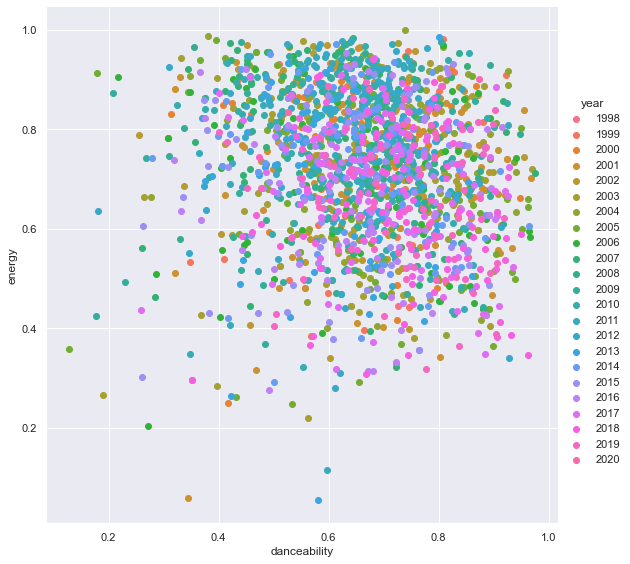

In [262]:
sns.FacetGrid(df, hue="year", height=8).map(plt.scatter, "danceability", "energy").add_legend()

Se observa que tanto la bailabilidad y energía de las canciones tienden a ubicarse en valores sobre 0.6, por lo que se puede inferir que, a lo largo de los últimos 20 años, la gente tiende a preferir canciones de alta intensidad que inviten al baile.

#### Gráfico 3D
Este gráfico permite identificar una relación entre las características técnicas de las canciones. En particular, se busca observar una cambio de tendencia entre el *tempo* y llave de una canción, en función del año en que fue publicada.

In [263]:
import plotly.express as px
fig= px.scatter_3d(df, x="year", y="tempo", z="key", color="key")
fig.update_layout(margin = dict(l=0, r=0, b=0, t=0),
                title={
                      'text':"Gráfico 3D de la relación entre tempo, danceability y loudness",
                      'y':0.9
                })
            
fig.show()

Se aprecia que el gráfico tiene una distribución homogénea en sus valores, indicando que no existe una relación observable entre el *tempo* y la llave de una canción, en función del año en que fue publicada.

_________________________________________________________

## Definición de variable target

Antes de proceder a la consrucción de modelo, se requiere definir una variable objetivo o *target*, de modo que nos permita establecer el objetivo de la investigación. Para eto, se observa la presencia de la variable *Popularity* en el *dataset*. Esta posee la siguiente forma:

In [264]:
df["popularity"].value_counts(dropna=False)

0     126
69     76
68     75
73     69
74     69
     ... 
88      1
89      1
87      1
8       1
7       1
Name: popularity, Length: 76, dtype: int64

Dado que no existe razón para predecir el valor exacto de la popularidad de una canción, se requiere que el modelo sea capaz de predecir sólo dos estados; popular o no popular. Con este fin, se reduce esta variable a dos estados: 0, indicando que una canción no es popular, y 1, indicando que es popular. Esto permite convertir el problema a uno asociado a una variable dependiente categórica.

In [265]:
df["popularity_target"] = pd.cut(df["popularity"], bins =[0,70,90], labels=[0,1], include_lowest=True )
df["popularity_target"] = df["popularity_target"].astype(int)
df["popularity_target"].value_counts(normalize=True)*100


0    66.45
1    33.55
Name: popularity_target, dtype: float64

## Ajuste y normalización de los datos

A partir de este punto, es importante que los datos sean ajustados y normalizados para que el modelo sea capaz de predecir con precisión. Análogamente, se busca mediante este proceso evitar la presencia de un sesgo y varianza en los datos.

En la entrega anterior, se identificó que la implementación de los algoritmos otorgaba modelos que no eran capaces de predecir con precisión aquellas canciones que eran muy populares. Dado que esto supone un conflicto directo con el objetivo de la investigación, se ha decidido realizar una corrección y normalización de los datos, en base al feedback y las herramientas proveídas en el curso.

Con esto en mente, se procede a realizar un ajuste a ciertas variables del *dataset*, particularmente aquellas de caracter categórico. 

#### Ajuste: *Year*
Dado que la variable *Year* se comporta esencialmente como una variable categórica, utilizamos una codificación ordinal, de modo que agrupamos segmentos (*bins*) de años, y luego cada segmento es mappeado a un valor numérico (1,2,3,etc.). Posteriormente, esa agrupación es añadido al *dataset* como una nueva variable.

In [266]:
edad = 2022 - df["year"]
edad.value_counts(dropna=False, ascending=False)

10    115
5     111
21    108
4     107
12    107
8     104
17    104
11     99
6      99
7      99
19     97
14     97
18     96
16     95
15     94
20     90
3      89
9      89
13     84
22     74
23     38
2       3
24      1
Name: year, dtype: int64

In [267]:
df["edad"] = pd.cut(2022 - df["year"], bins=[0,7,14,24], labels=[0,1,2], include_lowest=True)
df["edad"] = df["edad"].astype(int)
df["edad"].value_counts(dropna=False)

2    797
1    695
0    508
Name: edad, dtype: int64

#### Ajuste: *Explicit*
La trasformación para esta variable es sencilla; se debe transformar a una variable numérica.

In [268]:
df["explicit"] = df["explicit"].astype(int)
df["explicit"].value_counts(dropna=False)

0    1449
1     551
Name: explicit, dtype: int64

### Ajuste de variables compuestas por palabras

Este ajuste busca normalizar las variables compuestas por texto, esto considera las variables *Artist*, *Song* y *Title*. Se comprende normalizar como la estandarización del texto descrito en cada variable, lo que considera eliminar la puntuación, las mayúsculas, los espacios en blanco y las palabras sin significado (*stopwords*).

### Ajuste y normalización de variables de texto: *Genre*, *Artist* y *Title*


In [269]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fofi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Fofi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fofi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Fofi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [270]:
df["genre"] = df["genre"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df["genre"] = df["genre"].apply(lambda x: x.lower())
df["genre"] = df["genre"].apply(lambda x: x.split())
df["genre"] = df["genre"].apply(lambda x: [word for word in x if word not in (stopwords.words('spanish'))])
df["genre"] = df["genre"].apply(lambda x: ' '.join(x))

df["artist"] = df["artist"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df["artist"] = df["artist"].apply(lambda x: x.lower())
df["artist"] = df["artist"].apply(lambda x: x.split())
df["artist"] = df["artist"].apply(lambda x: [word for word in x if word not in (stopwords.words('spanish'))])
df["artist"] = df["artist"].apply(lambda x: ' '.join(x))

df["song"] = df["song"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df["song"] = df["song"].apply(lambda x: x.lower())
df["song"] = df["song"].apply(lambda x: x.split())
df["song"] = df["song"].apply(lambda x: [word for word in x if word not in (stopwords.words('spanish'))])
df["song"] = df["song"].apply(lambda x: ' '.join(x))


In [271]:
genres = ['pop','hip hop','rb','danceelectronic','rock','metal','latin','set',
 'country','folkacoustic','worldtraditional','blues','classical','easy listening']

for genre in genres:
    my_genre_list = []
    for row in df.genre:
        if(genre in row):
            my_genre_list.append(1)
        else:
            my_genre_list.append(0)
    df[genre] = my_genre_list

#### Muestreo de train/test
A consecuencia del cambio realizado en la definición de la variable target, se requiere una división proporcional y aleatoria del *dataset* en train y test. Para ello, hacemos uso de la función *Stratified Shuffle Split* de *Sklearn*. Esta función permite dividir un *dataset* en dos conjuntos de datos, uno para entrenamiento y otro para test, de forma que los conjuntos de datos de entrenamiento y test sean proporcionales y aleatorios respecto a la variable objetivo.

In [272]:
# Importación y conf. de SSsplit
from sklearn.model_selection import StratifiedShuffleSplit
SSSplit = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=28)

In [273]:
#Distribución de los datos del dataset según índice
for indiceTrain,indiceTest in SSSplit.split(df, df["popularity_target"]):
    df_train = df.loc[indiceTrain]
    df_test = df.loc[indiceTest]

Revisamos cómo queda la variable target sobre los datos de entrenamiento:

In [274]:
df_train["popularity_target"].value_counts(normalize=True)*100

0    66.4375
1    33.5625
Name: popularity_target, dtype: float64

In [275]:
df_train.shape

(1600, 34)

In [276]:
df_test.shape

(400, 34)

### Configuración de *pipes*

In [277]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train = df_train
Y_train = df_train["popularity_target"]
X_test = df_test
Y_test = df_test["popularity_target"]

In [278]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 49 to 1614
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist             1600 non-null   object 
 1   song               1600 non-null   object 
 2   duration_ms        1600 non-null   int64  
 3   explicit           1600 non-null   int32  
 4   year               1600 non-null   int64  
 5   popularity         1600 non-null   int64  
 6   danceability       1600 non-null   float64
 7   energy             1600 non-null   float64
 8   key                1600 non-null   int64  
 9   loudness           1600 non-null   float64
 10  mode               1600 non-null   int64  
 11  speechiness        1600 non-null   float64
 12  acousticness       1600 non-null   float64
 13  instrumentalness   1600 non-null   float64
 14  liveness           1600 non-null   float64
 15  valence            1600 non-null   float64
 16  tempo              1600

In [279]:
X_train.shape

(1600, 34)

In [280]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


In [281]:
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), ["explicit", "key","pop",'hip hop','rb','danceelectronic','rock','metal','latin','set','country','tempo','folkacoustic','worldtraditional','blues','classical','easy listening']),
    (OrdinalEncoder(), ["edad"]),
    (CountVectorizer(),"artist","genre","song"),
    (TfidfVectorizer(), "artist", "genre", "song"),
    (StandardScaler(), ["duration_ms","danceability","energy","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence"]),
    remainder="drop")

## Cross Validation 

Uno de los métodos más comunes para evualuar los modelos de Machine Learning en un dataset es utilizar *k-fold cross-validation*. Este procedimiento consiste en dividir el dataset en *k* subconjuntos, y luego entrenar el modelo *k* veces, cada vez utilizando un subconjunto diferente como conjunto de test, y el resto como conjunto de entrenamiento. El resultado final es el promedio de los *k* resultados obtenidos. 
Se evalua una *Logistic Regression* mediante este método.

In [282]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


#Pipeline para Regresión Logística
logreg = LogisticRegression(solver='liblinear',multi_class='auto', random_state=1,max_iter=10000)
LRpipe= make_pipeline(preprocessor, logreg)
LRpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['explicit', 'key', 'pop',
                                                   'hip hop', 'rb',
                                                   'danceelectronic', 'rock',
                                                   'metal', 'latin', 'set',
                                                   'country', 'tempo',
                                                   'folkacoustic',
                                                   'worldtraditional', 'blues',
                                                   'classical',
                                                   'easy listening']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), ['edad']),
                                                 ('countvectorizer',
                                                  CountVectorizer(), 'artist'),
                                                 ('tfidfvectorizer',
                                                  TfidfVectorizer(), 'artist'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration_ms',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, random_state=1,
                                    solver='liblinear'))])

Luego, se utiliza *Repeated Stratified K-Fold* como generador de clasificación cruzada, dado que se presenta una distribución desigual de clases en el *dataset*.

In [283]:
RSKfold =  RepeatedStratifiedKFold(n_splits=15, n_repeats=6, random_state=21)
mean_cvs = cross_val_score(LRpipe, X_train, Y_train, cv=RSKfold, scoring='accuracy').mean()
std_cvs =  cross_val_score(LRpipe, X_train, Y_train, cv=RSKfold, scoring='accuracy').std()
print("La media de la validación cruzada es: ", mean_cvs
      ,"\nLa desviación estándar de la validación cruzada es: ", std_cvs)

La media de la validación cruzada es:  0.7038764474225592 
La desviación estándar de la validación cruzada es:  0.0424687704538138


## Otros algoritmos candidatos para el modelo

Dada la naturaleza de nuestra variable, se comprende que los algoritmos que se pueden utilizar, en primera instancia, para la clasificación de una variable categórica son:  *Random Forest*, *Decision Tree* y *Logistic Regression*.

##  Implementación de *Decision Tree*


In [284]:
DTclass = DecisionTreeClassifier(max_depth=10, random_state=41)
DTpipe = make_pipeline(preprocessor, DTclass)
DTpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['explicit', 'key', 'pop',
                                                   'hip hop', 'rb',
                                                   'danceelectronic', 'rock',
                                                   'metal', 'latin', 'set',
                                                   'country', 'tempo',
                                                   'folkacoustic',
                                                   'worldtraditional', 'blues',
                                                   'classical',
                                                   'easy listening']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), ['edad']),
                                                 ('countvectorizer',
                                                  CountVectorizer(), 'artist'),
                                                 ('tfidfvectorizer',
                                                  TfidfVectorizer(), 'artist'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration_ms',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, random_state=41))])

In [285]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
DTpred = DTpipe.predict(X_test)
print(classification_report(Y_test, DTpred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       266
           1       0.43      0.43      0.43       134

    accuracy                           0.62       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.62      0.62      0.62       400



In [286]:
mean_cvs = cross_val_score(DTpipe, X_train, Y_train, cv=RSKfold, scoring='accuracy').mean()
std_cvs =  cross_val_score(DTpipe, X_train, Y_train, cv=RSKfold, scoring='accuracy').std()
print("La media de la validación cruzada es: ", mean_cvs
      ,"\nLa desviación estándar de la validación cruzada es: ", std_cvs)

La media de la validación cruzada es:  0.6510570348165128 
La desviación estándar de la validación cruzada es:  0.039598775511626653


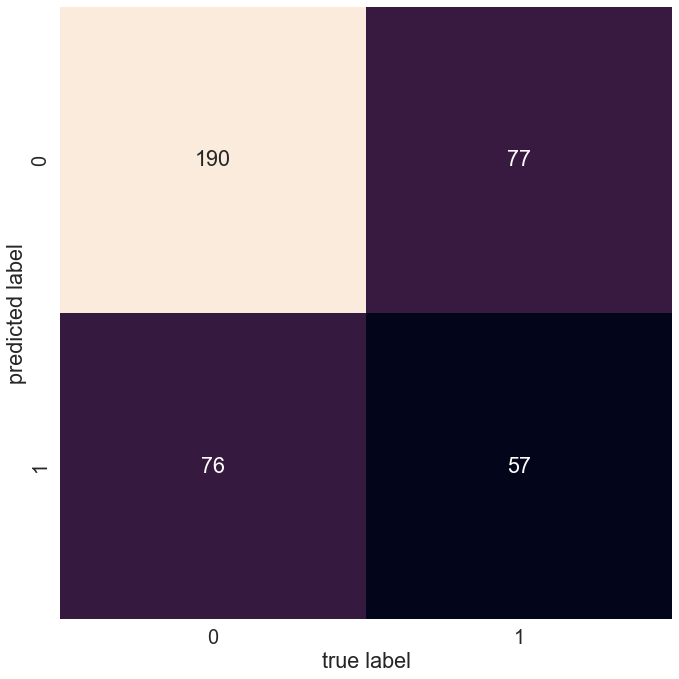

In [287]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.8)
mat = confusion_matrix(Y_test, DTpred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Y_test.unique(),
            yticklabels=Y_test.unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

## Implementación de *Random Forest*

In [288]:
RFClass = RandomForestClassifier(random_state=41, n_estimators=20,
                               class_weight="balanced", max_features="log2")
RTpipe = make_pipeline(preprocessor, RFClass)
RTpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['explicit', 'key', 'pop',
                                                   'hip hop', 'rb',
                                                   'danceelectronic', 'rock',
                                                   'metal', 'latin', 'set',
                                                   'country', 'tempo',
                                                   'folkacoustic',
                                                   'worldtraditional', 'blues',
                                                   'classical',
                                                   'easy listening']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), ['edad']),
                                                 ('cou...
                                                  CountVectorizer(), 'artist'),
                                                 ('tfidfvectorizer',
                                                  TfidfVectorizer(), 'artist'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration_ms',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features='log2', n_estimators=20,
                                        random_state=41))])

In [289]:
RTpred = RTpipe.predict(X_test)
print(classification_report(Y_test, RTpred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       266
           1       0.53      0.31      0.39       134

    accuracy                           0.68       400
   macro avg       0.62      0.59      0.59       400
weighted avg       0.65      0.68      0.65       400



In [290]:
cvs = cross_val_score(RTpipe, X_train, Y_train, cv=RSKfold, scoring='accuracy', n_jobs=-1)
mean_cvs = cvs.mean()
std_cvs = cvs.std()
print("La media de la validación cruzada es: ", mean_cvs
      ,"\nLa desviación estándar de la validación cruzada es: ", std_cvs)

La media de la validación cruzada es:  0.6963782597621426 
La desviación estándar de la validación cruzada es:  0.03776137712376882


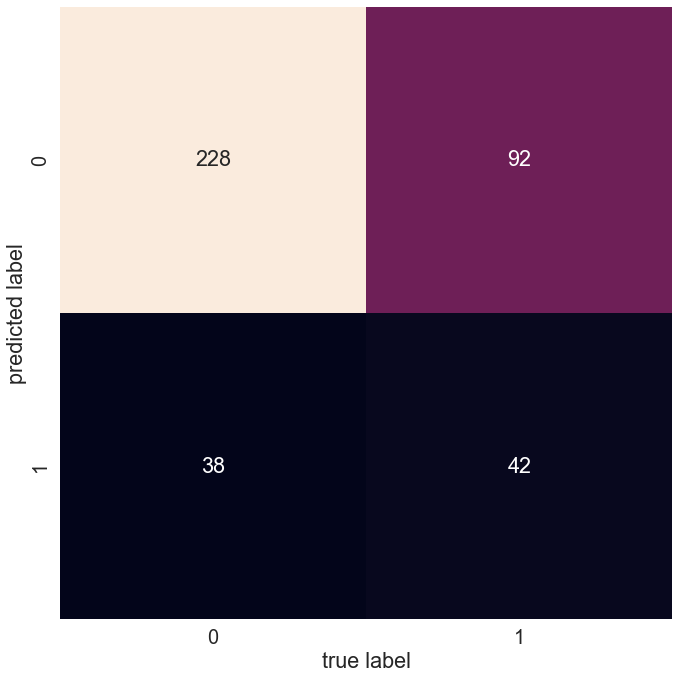

In [291]:
mat = confusion_matrix(Y_test, RTpred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Y_test.unique(),
            yticklabels=Y_test.unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

## Implementación de *Logistic Regression*

In [292]:
#Pipeline para Regresión Logística
logreg = LogisticRegression(solver='liblinear',multi_class='auto', random_state=41,max_iter=30000 )
pipeline = make_pipeline(preprocessor, logreg)
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['explicit', 'key', 'pop',
                                                   'hip hop', 'rb',
                                                   'danceelectronic', 'rock',
                                                   'metal', 'latin', 'set',
                                                   'country', 'tempo',
                                                   'folkacoustic',
                                                   'worldtraditional', 'blues',
                                                   'classical',
                                                   'easy listening']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), ['edad']),
                                                 ('countvectorizer',
                                                  CountVectorizer(), 'artist'),
                                                 ('tfidfvectorizer',
                                                  TfidfVectorizer(), 'artist'),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration_ms',
                                                   'danceability', 'energy',
                                                   'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=30000, random_state=41,
                                    solver='liblinear'))])

In [293]:
LRpred = DTpipe.predict(X_test)
print(classification_report(Y_test, LRpred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       266
           1       0.43      0.43      0.43       134

    accuracy                           0.62       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.62      0.62      0.62       400



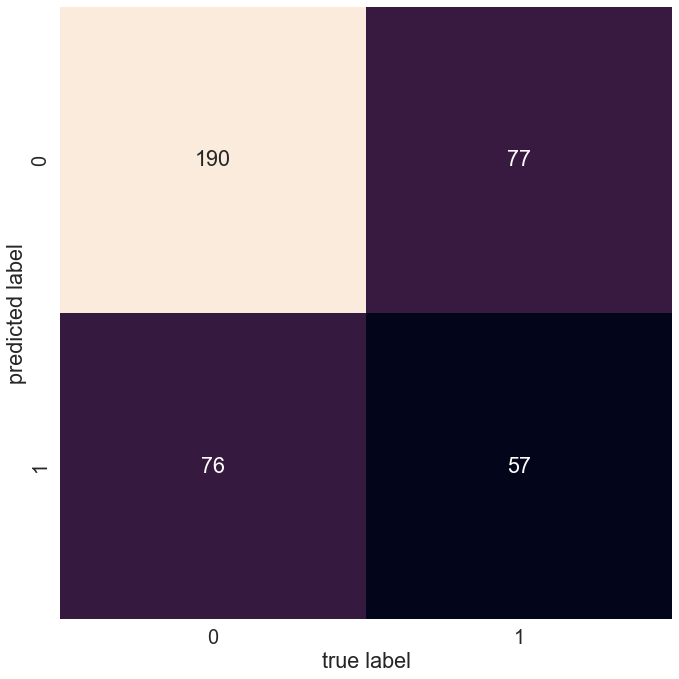

In [294]:
mat = confusion_matrix(Y_test, LRpred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Y_test.unique(),
            yticklabels=Y_test.unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

## Conclusión

En base a los resultados obtenidos, se con concluye que los resultados emitidos por los algortimos proveen estimaciones similares en cuanto a la probabilidad de que una canción sea popular. Sin embargo, se observa que el algoritmo de *Random Forest* es el que mejor se ajusta a los datos, con un *accuracy* de 0.71 para la predicción de una canción no popular y 0.53 para la predicción de una canción popular. De igual modo, su f1-score de 0.68 ofrece una mejor estimación de la precisión del modelo, en comparación con su similitud con los resultados obtenidos por *Logistic Regression*.

